In [1]:
import pandas as pd

df1 = pd.read_csv('2W Keywords - 2W.csv')
df1['Type'] = '2W'
df1['ID'] = 0
df1.rename(columns = {'2W Keywords':'SearchedWord'}, inplace = True)

df2 = pd.read_csv('4W Keywords - 4W.csv')
df2['Type'] = '4W'
df2['ID'] = 1
df2.rename(columns = {'4W Keywords':'SearchedWord'}, inplace = True)

df3 = pd.read_csv('Brand Keyterms - Brand Keyterms.csv')
df3['Type'] = 'Brand'
df3['ID'] = 2
df3.rename(columns = {'Brand Keyterms':'SearchedWord'}, inplace = True)

df4 = pd.read_csv('Health Keywords - Health.csv')
df4['Type'] = 'Health'
df4['ID'] = 3
df4.rename(columns = {'Health Keywords':'SearchedWord'}, inplace = True)


df5 = pd.read_csv('Travel Keywords - Travel.csv')
df5['Type'] = 'Travel'
df5['ID'] = 4
df5.rename(columns = {'Travel Keywords':'SearchedWord'}, inplace = True)


In [2]:
df1.head()

,SearchedWord,Type,ID
0,bike insurance check online,2W,0
1,bike insurance,2W,0
2,online two wheeler insurance,2W,0
3,two wheeler bike insurance,2W,0
4,cheapest bike insurance,2W,0


In [3]:
df2.head()

,SearchedWord,Type,ID
0,motor insurance,4W,1
1,online vehicle insurance,4W,1
2,online insurance car,4W,1
3,cheap car insurance,4W,1
4,online car insurance policy,4W,1


In [4]:
df3.head()

,SearchedWord,Type,ID
0,[bajaj allianz],Brand,2
1,[iffco tokio general insurance company limited],Brand,2
2,[acko general insurance],Brand,2
3,[new india assurance],Brand,2
4,[icici lombard general insurance],Brand,2


In [5]:
df3.head()

,SearchedWord,Type,ID
0,[bajaj allianz],Brand,2
1,[iffco tokio general insurance company limited],Brand,2
2,[acko general insurance],Brand,2
3,[new india assurance],Brand,2
4,[icici lombard general insurance],Brand,2


In [6]:
df4.head()

,SearchedWord,Type,ID
0,+allianz +health +Insurance,Health,3
1,+allianz +mediclaim,Health,3
2,+bajaj +allianz +health,Health,3
3,+bajaj +allianz +health +Insurance,Health,3
4,+bajaj +allianz +mediclaim,Health,3


In [7]:
df5.head()

,SearchedWord,Type,ID
0,travel insurance,Travel,4
1,overseas travel insurance,Travel,4
2,visa travel insurance,Travel,4
3,schengen visa insurance,Travel,4
4,visa insurance,Travel,4


In [8]:
df  = pd.concat([df1, df2, df3, df4, df5] ,axis = 0)
df.head()

,SearchedWord,Type,ID
0,bike insurance check online,2W,0
1,bike insurance,2W,0
2,online two wheeler insurance,2W,0
3,two wheeler bike insurance,2W,0
4,cheapest bike insurance,2W,0


In [22]:
from io import StringIO
col = ['Type', 'SearchedWord']
df = df[col]
df = df[pd.notnull(df['SearchedWord'])]
df.columns = ['Type', 'SearchedWord']
df['ID'] = df['Type'].factorize()[0]
category_id_df = df[['Type', 'ID']].drop_duplicates().sort_values('Type')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['ID', 'Type']].values)
df.head()

,Type,SearchedWord,ID
0,2W,bike insurance check online,0
1,2W,bike insurance,0
2,2W,online two wheeler insurance,0
3,2W,two wheeler bike insurance,0
4,2W,cheapest bike insurance,0


## MultinomialNB

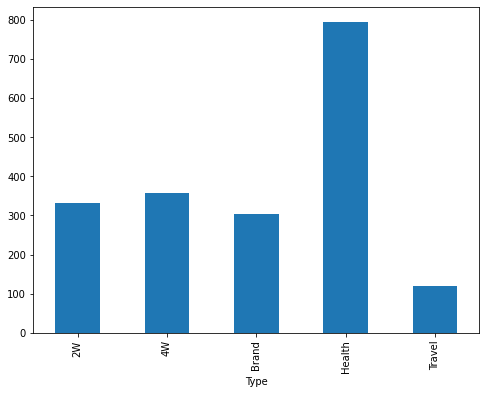

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Type').SearchedWord.count().plot.bar(ylim=0)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.SearchedWord).toarray()
labels = df.SearchedWord
features.shape

(1905, 311)

In [25]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Type, ID in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == ID)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Type))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '2W':
  . Most correlated unigrams:
. enfield
. digit
  . Most correlated bigrams:
. floater health
. zero depreciation
# '4W':
  . Most correlated unigrams:
. enfield
. digit
  . Most correlated bigrams:
. floater health
. zero depreciation
# 'Brand':
  . Most correlated unigrams:
. enfield
. digit
  . Most correlated bigrams:
. floater health
. zero depreciation
# 'Health':
  . Most correlated unigrams:
. enfield
. digit
  . Most correlated bigrams:
. floater health
. zero depreciation
# 'Travel':
  . Most correlated unigrams:
. enfield
. digit
  . Most correlated bigrams:
. floater health
. zero depreciation


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-p

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['SearchedWord'], df['ID'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
clf.score(y_test, clf.predict(X_test))

ValueError: could not convert string to float: 'best auto insurance online'

In [30]:
i = input("Enter the query: ")
k = clf.predict(count_vect.transform([i]))

if k == 0 :
    print("2W")
if k == 1:
    print("4W")
if k == 2:
    print("BrandWords")
if k == 3:
    print("Health")
if k == 4:
    print("Travel")

Enter the query: buy health
Health


In [ ]:
['2W' , '4W' , 'Brand' , 'Health' , 'Travel' , 'Commercial' , 'cyber' , 'Home' , 'Pet']


## Multinomial Logistic Regression

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

D = pd.DataFrame()
D['Values'] = X_test
D['Type'] = y_pred

for idx in D.index:
    
    k = D['Type'][idx]
    print(k)
    
    '''
    if k == 0 :
        D['Type'][idx] = "2W"
    if k == 1:
        D['Type'][idx] = "4W"
    if k == 2:
        D['Type'][idx] = "BrandWords"
    if k == 3:
        D['Type'][idx] = "Health"
    if k == 4:
        D['Type'][idx] = 'Travel'
    '''

106    1
106    2
Name: Type, dtype: int64
53    0
53    1
53    3
53    4
Name: Type, dtype: int64
2
3
106    1
106    2
Name: Type, dtype: int64
187    1
187    0
187    2
Name: Type, dtype: int64
0
0
15    4
15    1
Name: Type, dtype: int64
3
3
2
3
3
3
1
3
2
85    2
85    0
Name: Type, dtype: int64
83    4
83    3
Name: Type, dtype: int64
0
171    1
171    0
Name: Type, dtype: int64
277    2
277    1
Name: Type, dtype: int64
0
104    2
104    1
Name: Type, dtype: int64
3    3
3    4
Name: Type, dtype: int64
1
3
3
135    0
135    3
Name: Type, dtype: int64
236    3
236    2
Name: Type, dtype: int64
0
149    1
149    3
Name: Type, dtype: int64
0
80    0
80    4
80    2
80    1
Name: Type, dtype: int64
289    0
289    1
Name: Type, dtype: int64
3
0
4
220    0
220    3
Name: Type, dtype: int64
3
3
18    0
18    2
18    4
Name: Type, dtype: int64
2
76    0
76    2
76    1
76    4
Name: Type, dtype: int64
289    0
289    1
Name: Type, dtype: int64
0
3
61    1
61    3
Name: Type, dtype: in

In [16]:
words_by_first3 = {}
for word in word_set:
    first3 = word[:3]
    if first3 not in words_by_first3:
        words_by_first3[first3] = set()
    words_by_first3[first3].add(word) 

NameError: name 'word_set' is not defined

## Multi-Class Text Classification with LSTM

In [10]:
df

,SearchedWord,Type,ID
0,bike insurance check online,2W,0
1,bike insurance,2W,0
2,online two wheeler insurance,2W,0
3,two wheeler bike insurance,2W,0
4,cheapest bike insurance,2W,0
...,...,...,...
116,"""bajaj allianz travel insurance india""",Travel,4
117,"""bajaj travel insurance policy""",Travel,4
118,"""bajaj allianz overseas travel insurance india""",Travel,4
119,"""bajaj allianz travel health insurance""",Travel,4


In [11]:
df.Type.value_counts()

Health    793
4W        356
2W        332
Brand     303
Travel    121
Name: Type, dtype: int64

In [12]:
df['Type'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Total Searches Done')

AttributeError: 'Series' object has no attribute 'iplot'

In [ ]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

In [9]:
df

,SearchedWord,Type,ID
0,bike insurance check online,2W,0
1,bike insurance,2W,0
2,online two wheeler insurance,2W,0
3,two wheeler bike insurance,2W,0
4,cheapest bike insurance,2W,0
...,...,...,...
116,"""bajaj allianz travel insurance india""",Travel,4
117,"""bajaj travel insurance policy""",Travel,4
118,"""bajaj allianz overseas travel insurance india""",Travel,4
119,"""bajaj allianz travel health insurance""",Travel,4


In [19]:
L = []
for i in df.SearchedWord :
    k = i.split(" ")
    for j in k:
        currStr = ""
        for f in j:
            if f.isalpha() == True:
                currStr += f
        L.append(currStr)
print(L)

['bike', 'insurance', 'check', 'online', 'bike', 'insurance', 'online', 'two', 'wheeler', 'insurance', 'two', 'wheeler', 'bike', 'insurance', 'cheapest', 'bike', 'insurance', 'online', 'insurance', 'bike', 'insurance', 'bike', 'online', 'bike', 'insurance', 'bike', 'insurance', 'online', 'best', 'bike', 'insurance', 'online', 'bike', 'insurance', 'price', 'list', 'new', 'bike', 'insurance', 'insurance', 'two', 'wheeler', 'two', 'wheeler', 'insurance', 'bajaj', 'allianz', 'two', 'wheeler', 'insurance', 'two', 'wheeler', 'insurance', 'online', 'two', 'wheeler', 'insurance', 'quotes', 'online', 'bajaj', 'allianz', 'bike', 'insurance', 'bike', 'insurance', 'kaise', 'kare', 'online', 'insurance', 'of', 'bike', 'bajaj', 'allianz', '', 'wheeler', 'insurance', 'bike', 'online', 'insurance', 'best', 'bike', 'insurance', 'w', 'insurance', 'buy', 'two', 'wheeler', 'policy', 'online', 'bajaj', 'bike', 'insurance', 'zero', 'dep', 'insurance', 'for', 'bike', 'bajaj', 'two', 'wheeler', 'insurance', '

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """This is a sample sentence,
				showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = L

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

filtered_sentence = []

for w in word_tokens:
	if w not in stop_words:
		filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)


['bike', 'insurance', 'check', 'online', 'bike', 'insurance', 'online', 'two', 'wheeler', 'insurance', 'two', 'wheeler', 'bike', 'insurance', 'cheapest', 'bike', 'insurance', 'online', 'insurance', 'bike', 'insurance', 'bike', 'online', 'bike', 'insurance', 'bike', 'insurance', 'online', 'best', 'bike', 'insurance', 'online', 'bike', 'insurance', 'price', 'list', 'new', 'bike', 'insurance', 'insurance', 'two', 'wheeler', 'two', 'wheeler', 'insurance', 'bajaj', 'allianz', 'two', 'wheeler', 'insurance', 'two', 'wheeler', 'insurance', 'online', 'two', 'wheeler', 'insurance', 'quotes', 'online', 'bajaj', 'allianz', 'bike', 'insurance', 'bike', 'insurance', 'kaise', 'kare', 'online', 'insurance', 'of', 'bike', 'bajaj', 'allianz', '', 'wheeler', 'insurance', 'bike', 'online', 'insurance', 'best', 'bike', 'insurance', 'w', 'insurance', 'buy', 'two', 'wheeler', 'policy', 'online', 'bajaj', 'bike', 'insurance', 'zero', 'dep', 'insurance', 'for', 'bike', 'bajaj', 'two', 'wheeler', 'insurance', '

In [21]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
import pickle
sample_list = filtered_sentence
file_name = "sample.pkl"

open_file = open(file_name, "wb")
pickle.dump(sample_list, open_file)
open_file.close()

In [26]:
df.to_csv('SearchWords.csv')

In [41]:
df

,SearchedWord,Type,ID
0,bike insurance check online,2W,0
1,bike insurance,2W,0
2,online two wheeler insurance,2W,0
3,two wheeler bike insurance,2W,0
4,cheapest bike insurance,2W,0
...,...,...,...
116,"""bajaj allianz travel insurance india""",Travel,4
117,"""bajaj travel insurance policy""",Travel,4
118,"""bajaj allianz overseas travel insurance india""",Travel,4
119,"""bajaj allianz travel health insurance""",Travel,4


In [43]:
pip install gensim

     ---------------------------------------- 23.9/23.9 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 983.8/983.8 KB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline


df = df[pd.notnull(df['Type'])]
print(df.head(10))
print(df['SearchedWord'].apply(lambda x: len(x.split(' '))).sum())

                   SearchedWord Type  ID
0   bike insurance check online   2W   0
1                bike insurance   2W   0
2  online two wheeler insurance   2W   0
3    two wheeler bike insurance   2W   0
4       cheapest bike insurance   2W   0
5         online insurance bike   2W   0
6                insurance bike   2W   0
7         online bike insurance   2W   0
8         bike insurance online   2W   0
9    best bike insurance online   2W   0
8039


In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


NameError: name 'CountVectorizer' is not defined

In [56]:
i = input("Enter the query: ")
k = nb.predict([i])

if k == 0 :
    print("2W")
if k == 1:
    print("4W")
if k == 2:
    print("BrandWords")
if k == 3:
    print("Health")
if k == 4:
    print("Travel")

Enter the query: buy health
Health


In [57]:
import joblib

In [58]:
joblib.dump(nb,'model_joblib')

['model_joblib']

In [60]:
model = joblib.load('model_joblib')

In [65]:
CurrString = input("Enter the string: ")
TypeOf = model.predict([CurrString])
print(TypeOf)

if True == True :

    if k == 0 :
        data = pd.read_csv('2W Keywords - 2W.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 1:
        data = pd.read_csv('4W Keywords - 4W.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 2:
        data = pd.read_csv('Brand Keyterms - Brand Keyterms.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 3:
        data = pd.read_csv('Brand Keyterms - Brand Keyterms.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 4:
        data = pd.read_csv('Travel Keywords - Travel.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)

Enter the string: cars
[3]
['[bajaj allianz]', '[iffco tokio general insurance company limited]', '[acko general insurance]', '[new india assurance]', '[icici lombard general insurance]', '[go digit general insurance limited]', '[bajaj allianz general insurance]', '[hdfc ergo general insurance company limited]', '[bajaj insurance]', '[the oriental insurance]', '[general insurance]', '[reliance insurance]', '[bajajallianz]', '[icici lombard general]', '[insurance policy]', '[general bajajallianz]', '[universal sompo gic]', '[online insurance]', '[hdfc ergo general insurance company]', '[national insurance company limited website]', '[digit general insurance limited]', '[go digit insurance company]', '[future generali]', '[online insurance policy]', '[bajaj allianz insurance]', '[bajaj insurance policy]', '[bajaj general insurance]', '[www new india assurance company]', '[online insurance quotes]', '[bajaj allianz general insurance company limited]', '[new india insurance company]', '[ba

In [ ]:
CurrString = input("Enter the string: ")
TypeOf = model.predict([CurrString])
print(TypeOf)

if True == True :

    if k == 0 :
        data = pd.read_csv('2W Keywords - 2W.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 1:
        data = pd.read_csv('4W Keywords - 4W.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 2:
        data = pd.read_csv('Brand Keyterms - Brand Keyterms.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 3:
        data = pd.read_csv('Brand Keyterms - Brand Keyterms.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)
    if k == 4:
        data = pd.read_csv('Travel Keywords - Travel.csv')
        ListofAllWords = list(data.SearchedWord)
        print(ListofAllWords)

In [1]:
L = []
for i in df.SearchedWord :
    k = i.split(" ")
    for j in k:
        currStr = ""
        for f in j:
            if f.isalpha() == True:
                currStr += f
        L.append(currStr)
print(L)

NameError: name 'df' is not defined